# 插入影像

openpyxi 模組有支援將影像插入到工作表，在執行前需要導入Image 模組，如下所示：
`from openpyxl.drawing.image import Image`

經過上述宣告後，就可以使用下列指令建立影像物件。
`img = Image（影像檔案）`

有了影像物件img後，未來可以使用`add_image（）`函數將影像插入工作表，例如：
```
# 若是要將影像插入 A1 儲存格，指令如下：
ws.add_image（img， 'A1"）
```


In [5]:
import openpyxl
from openpyxl.drawing.image import Image

wb = openpyxl.Workbook()
ws = wb.active

img = Image("./input file/安尼亞看到有人在色色.jpg")     # 建立影像物件 img
print(f"img的寬 = {img.width}")
print(f"img的高 = {img.height}")

# 計算新的尺寸（以原始尺寸的 0.5 倍為例）
img.width *= 0.5
img.height *= 0.5

print(f"img的寬 = {img.width}")
print(f"img的高 = {img.height}")
ws.add_image(img,'A1')      # 將 img 插入 A1

# 調整位置
img.anchor = "B2"

# 儲存結果
wb.save('./output file/圖片插入示範.xlsx')

img的寬 = 563
img的高 = 545
img的寬 = 281.5
img的高 = 272.5


## 插入影像的相關應用

In [7]:
# 嘗試應用於插入人事資料表
import openpyxl
from openpyxl.drawing.image import Image

fn = "./input file/海綿人事資料表.xlsx"
wb = openpyxl.load_workbook(fn)
ws = wb.active

img = Image("./input file/安尼亞看到有人在色色.jpg")     # 建立影像物件 img
img.width = 64 * 2          # 預留影像寬度
img.height = 23 * 5         # 預留影像高度

ws.add_image(img,'B4')      # 將 img 插入 B4
# 儲存結果
wb.save('./output file/海綿人事資料表.xlsx')

模組 openpyxl 模組可以建立的圖表有許多，目前支援的圖表有 BarChart（直條圖）、BarChart3D（3D 直條圖）、PieChart（圓形圖）、PieChart3D（3D 圓形圖）、BubbleChart（ 泡泡圖）、AreaChart（區域圖）、AreaChart3D（3D 區域圖）、LineChart（線段圖）、LineChart3D（3D 線段圖）、RadarChart（雷達圖）、StockChart（股票圖），為了建立圖表需要導入圖表模組。

上述英文名稱就是建立圖表的方法，本章重點是建立直條系列圖表，所以導入模組方法如下：
```
from openpyxl.chart import BarChart, Reference #以導入 BarChart為例
```

另外需導入 Reference 方法，這個方法主要是供我們將建立圖表所需的工作表資料或是標籤名稱（有時也可稱軸的標籤）資料導入所建的圖表物件內。

## 直條圖 BarChart()

### 圖表資料來源
要繪製圖表首先要了解圖表的資料來源，可以使用 Reference（）函數建立參考物件，這個物件會標記資料來源，此函數的用法如下：
```
data = Reference(ws, min_col, min_row, max_col, max_row)
```

上述會回傳標記資料來源的參考物件 data，至於各參數意義如下：
- ws：工作表物件。
-  min_col：資料所在的最小欄位。
- min_row：資料所在的最小列。
- max_col：資料所在的最大欄位。
- max_row：資料所在的最大列。

### 建立直條圖
```
chart = BarChar()
```

### 將資料加入圖表
可以使用 add_data（）函數將參照物件 data（圖表資料）加入圖表。
```
chart.add_data(data,titles_from_data)
```

### 將圖表加入工作表
```
ws.add_chart(chart, "C2")
```



In [11]:
import openpyxl
from openpyxl.chart import BarChart, Reference

wb = openpyxl.Workbook()
ws = wb.active
# 新增資料
for i in range(1,9):
    ws.append([i])

# 建立資料來源
data = Reference(ws,min_col=1,min_row=1,max_col=1,max_row=8)
chart = BarChart()          # 建立直條圖表物件
chart.add_data(data)        # 將資料加入圖表
ws.add_chart(chart,"C2")    # 將直條圖表加入工作表
# 儲存結果
wb.save('./output file/基礎建立直條圖.xlsx')

### 建立座標軸標題

有了圖表物件，可以使用下列屬性建立 ×軸和y軸標題：
```
chart.x_axis.title 
chart.y_axis.title
```

### 更改直條圖顏色

要設定直條填滿的顏色，可以用直條物件的 graphicalProperties.solidFill 屬性，顏色則需使用 ColorChoice（）函數，此函數內容如下：
`ColorChoice（prsClr="xx"）`

In [13]:
import openpyxl
from openpyxl.chart import BarChart, Reference
from openpyxl.drawing.fill import ColorChoice

wb = openpyxl.Workbook()                # 開啟活頁簿
ws = wb.active                          # 獲得目前工作表
rows = [
    ['', '2023年', '2024年'],
    ['亞洲', 100, 300],
    ['歐洲', 400, 600],
    ['美洲', 500, 700],
    ['非洲', 200, 100]]
for row in rows:
    ws.append(row)
    
# 建立資料來源
data = Reference(ws,min_col=2,max_col=3,min_row=1,max_row=5)    
# 建立直條圖物件
chart = BarChart()                      # 直條圖
# 將資料加入圖表
chart.add_data(data, titles_from_data=True) # 建立圖表
# 建立圖表和座標軸標題
chart.title = '天線寶寶玩偶銷售表'          # 圖表標題
chart.x_axis.title = '地區'             # x軸標題
chart.y_axis.title = '業績金額'         # y軸標題
# x軸資料標籤 (亞洲歐洲美洲非洲)
xtitle = Reference(ws,min_col=1,min_row=2,max_row=5)         
chart.set_categories(xtitle)

# 更改圖表的寬度和高度
chart.width = 12
chart.height = 5.4

# 隱藏圖例
# chart.legend = None


# 設定資料區間的寬度
# 屬性 gapWidth 可以設定的值在0-500之間，如果 gapWidth 越大資料長條的寬度就比較小，如果 gapWidth 越小長條的寬度就比較小。
chart.gapWidth = 50

# 設定長條色彩
ser0 = chart.series[0]
ser0.graphicalProperties.solidFill=ColorChoice(prstClr="green")
ser1 = chart.series[1]
ser1.graphicalProperties.solidFill=ColorChoice(prstClr="orange")


# 將圖表放在工作表 E1
ws.add_chart(chart, 'E1')      
wb.save('./output file/天線寶寶玩偶銷售表.xlsx')

### 直條圖色彩樣式

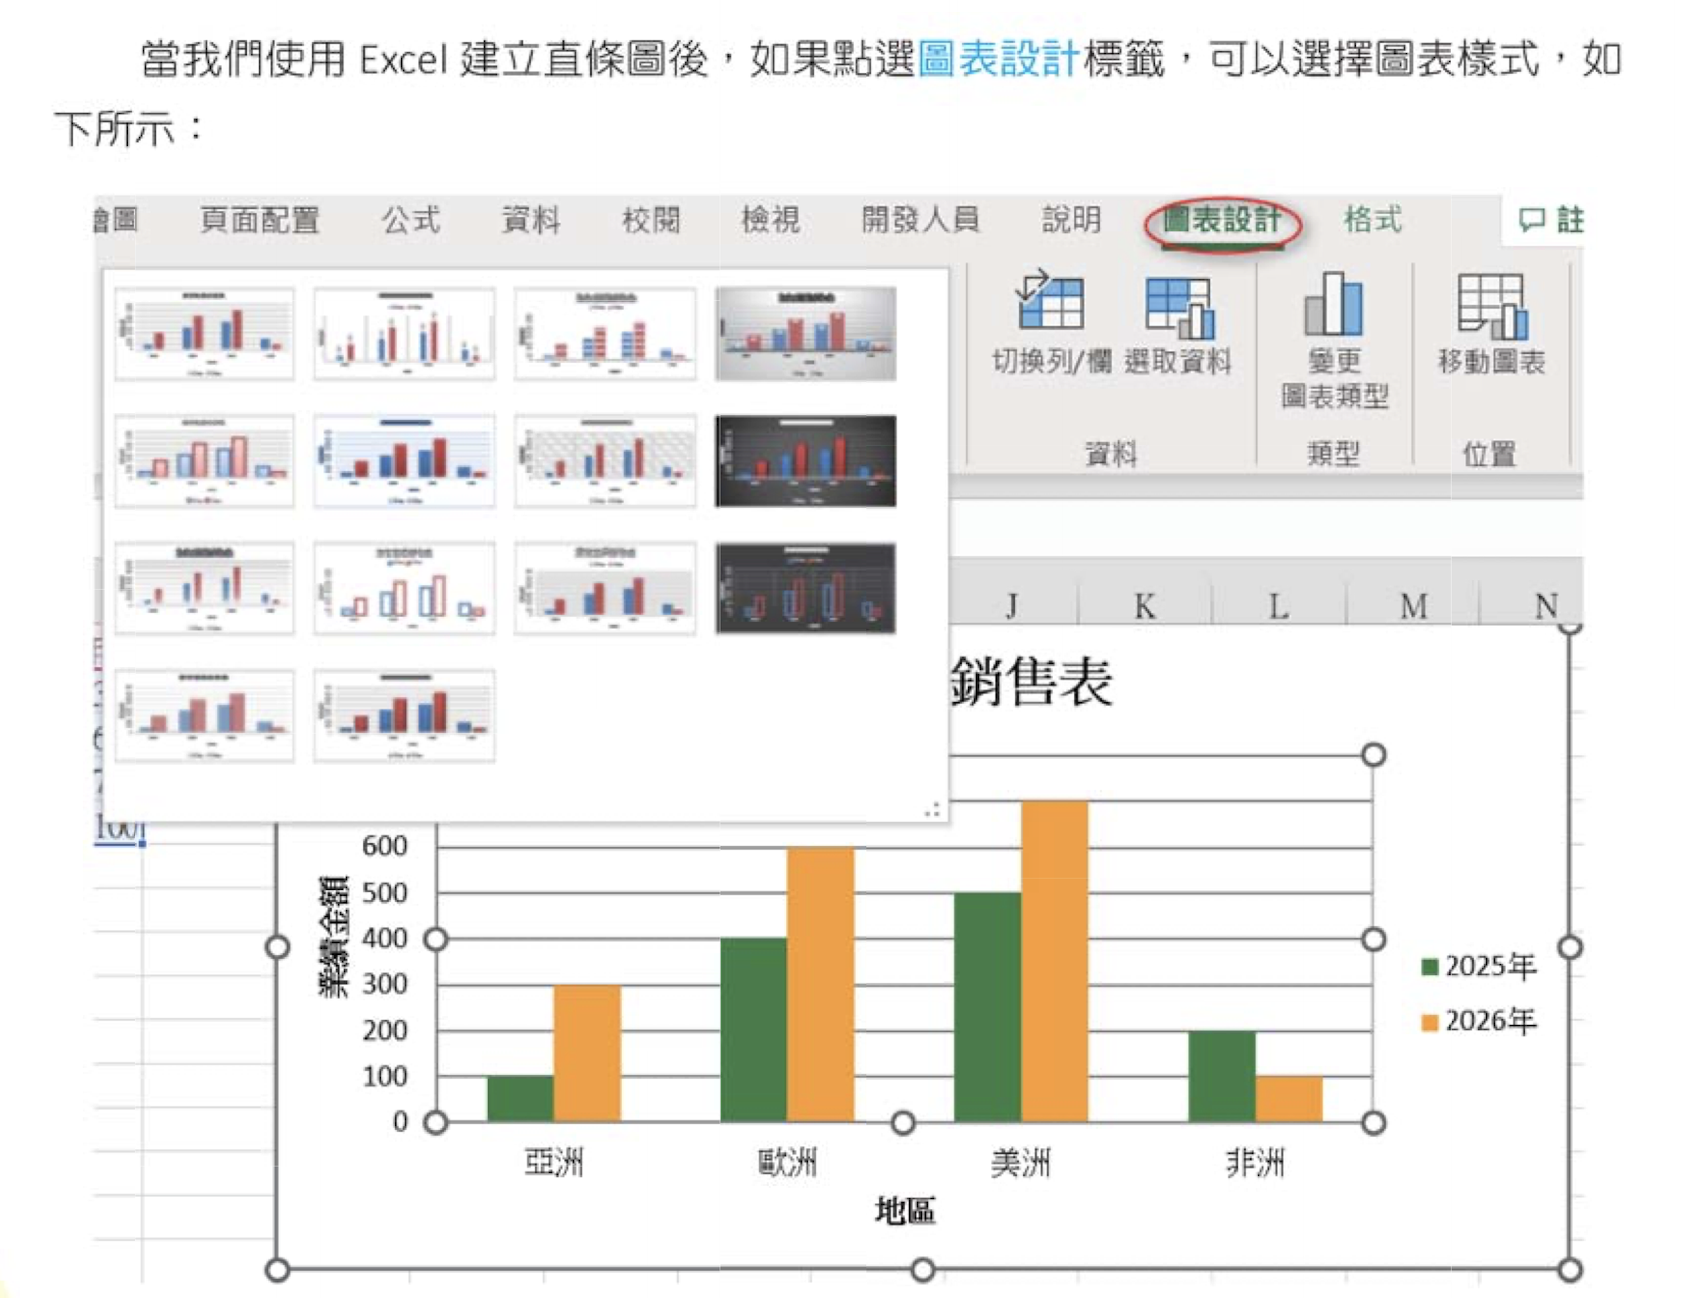

In [17]:
import openpyxl
from openpyxl.chart import BarChart, Reference

wb = openpyxl.Workbook()                # 開啟活頁簿
ws = wb.active                          # 獲得目前工作表
rows = [
    ['', '2023年', '2024年'],
    ['亞洲', 100, 300],
    ['歐洲', 400, 600],
    ['美洲', 500, 700],
    ['非洲', 200, 100]]
for row in rows:
    ws.append(row)
    
# 建立資料來源
data = Reference(ws,min_col=2,max_col=3,min_row=1,max_row=5)    
# 建立直條圖物件
chart = BarChart()                      # 直條圖
# 將資料加入圖表
chart.add_data(data, titles_from_data=True) # 建立圖表
# 建立圖表和座標軸標題
chart.title = '天線寶寶玩偶銷售表'          # 圖表標題
chart.x_axis.title = '地區'             # x軸標題
chart.y_axis.title = '業績金額'         # y軸標題
# x軸資料標籤 (亞洲歐洲美洲非洲)
xtitle = Reference(ws,min_col=1,min_row=2,max_row=5)         
chart.set_categories(xtitle)
# 設定長條圖表色彩樣式
chart.style = 48 # 不同數字都可以改看看

# 將圖表放在工作表 E1
ws.add_chart(chart, 'E1')      

wb.save('./output file/天線寶寶玩偶銷售表.xlsx')

查看效果

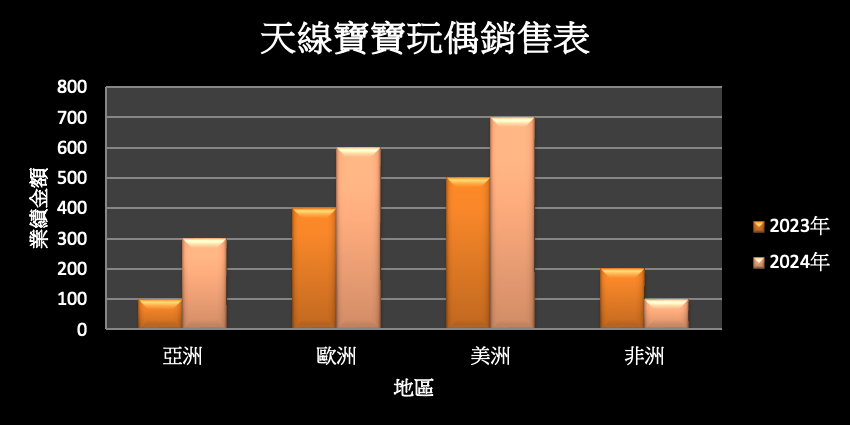

## 橫條圖
```
chart.type = "col" #這是預設，也就是直條圖。
chart.type = "bar" #設定橫條圖
```


In [21]:
import openpyxl
from openpyxl.chart import BarChart, Reference

wb = openpyxl.Workbook()                # 開啟活頁簿
ws = wb.active                          # 獲得目前工作表
rows = [
    ['', '2023年', '2024年'],
    ['亞洲', 100, 300],
    ['歐洲', 400, 600],
    ['美洲', 500, 700],
    ['非洲', 200, 100]]
for row in rows:
    ws.append(row)
    
# 建立資料來源
data = Reference(ws,min_col=2,max_col=3,min_row=1,max_row=5)    
# 建立直條圖物件
chart = BarChart()                      # 直條圖
chart.type = "bar"                      # 改為橫條圖
# 將資料加入圖表
chart.add_data(data, titles_from_data=True) # 建立圖表
# 建立圖表和座標軸標題
chart.title = '天線寶寶玩偶銷售表'          # 圖表標題
chart.x_axis.title = '地區'             # x軸標題
chart.y_axis.title = '業績金額'         # y軸標題
# x軸資料標籤 (亞洲歐洲美洲非洲)
xtitle = Reference(ws,min_col=1,min_row=2,max_row=5)         
chart.set_categories(xtitle)
# 將圖表放在工作表 E1
ws.add_chart(chart, 'E1')      
wb.save('./output file/天線寶寶玩偶銷售表.xlsx')

查看效果

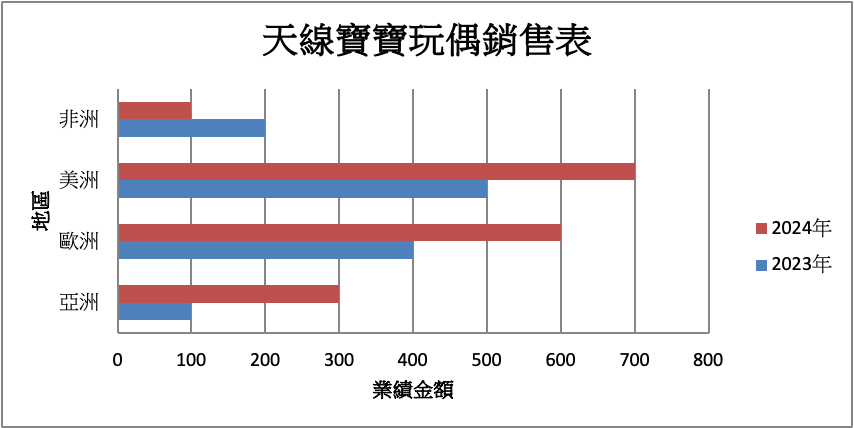

### 直條堆疊圖

直條堆疊圖有2種，一個是一般堆疊直條圖（stacked chart），另一個是百分比堆疊直條圖（percentStack chart）。

與堆疊直條圖有關的圖表物件屬性如下：
`chart.grouping = "xx"`

上述 xx 可以有下列選項。
- standard：這是預設，表示是直條圖。
- stacked：一般堆疊直條圖。
- percentStacked：百分比堆疊直條圖。

當將直條圖改為堆疊直條圖後，還可以設定 overlap 屬性，這個屬性可以設定資料在堆疊時，是否有位移產生，直需是在-100~100之間。overlap= 100，表示完美連接，如果數值越小距離越遠。

In [24]:
# 建立一般堆疊直條圖
import openpyxl
from openpyxl.chart import BarChart, Reference

wb = openpyxl.Workbook()                # 開啟活頁簿
ws = wb.active                          # 獲得目前工作表
rows = [
    ['', '2023年', '2024年'],
    ['亞洲', 100, 300],
    ['歐洲', 400, 600],
    ['美洲', 500, 700],
    ['非洲', 200, 100]]
for row in rows:
    ws.append(row)
    
# 建立資料來源
data = Reference(ws,min_col=2,max_col=3,min_row=1,max_row=5)    
# 建立直條圖物件
chart = BarChart()                      # 直條圖
# 將資料加入圖表
chart.add_data(data, titles_from_data=True) # 建立圖表
# 建立圖表和座標軸標題
chart.title = '天線寶寶玩偶銷售表'          # 圖表標題
chart.x_axis.title = '地區'             # x軸標題
chart.y_axis.title = '業績金額'         # y軸標題
# x軸資料標籤 (亞洲歐洲美洲非洲)
xtitle = Reference(ws,min_col=1,min_row=2,max_row=5)         
chart.set_categories(xtitle)

# 建立堆疊直條圖, 不設定 chart.overlap
# chart.grouping = "stacked"

# 建立堆疊直條圖, 設定 chart.overlap=100
chart.grouping = "stacked"
chart.overlap = 100

# 將圖表放在工作表 E1
ws.add_chart(chart, 'E1')      
wb.save('./output file/天線寶寶玩偶銷售表.xlsx')

查看效果

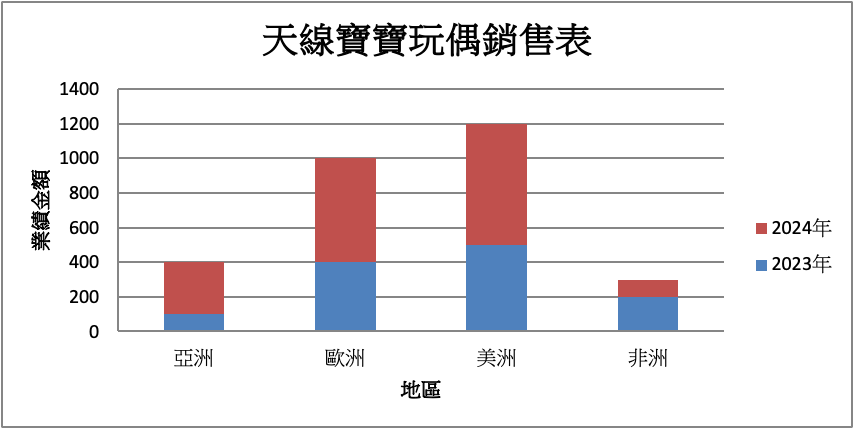

In [25]:
# 建立百分比堆疊直條圖
import openpyxl
from openpyxl.chart import BarChart, Reference

wb = openpyxl.Workbook()                # 開啟活頁簿
ws = wb.active                          # 獲得目前工作表
rows = [
    ['', '2025年', '2026年'],
    ['亞洲', 100, 300],
    ['歐洲', 400, 600],
    ['美洲', 500, 700],
    ['非洲', 200, 100]]
for row in rows:
    ws.append(row)
    
# 建立資料來源
data = Reference(ws,min_col=2,max_col=3,min_row=1,max_row=5)    
# 建立直條圖物件
chart = BarChart()                      # 直條圖
# 將資料加入圖表
chart.add_data(data, titles_from_data=True) # 建立圖表
# 建立圖表和座標軸標題
chart.title = '天線寶寶玩偶銷售表'          # 圖表標題
chart.x_axis.title = '地區'             # x軸標題
chart.y_axis.title = '業績金額'         # y軸標題
# x軸資料標籤 (亞洲歐洲美洲非洲)
xtitle = Reference(ws,min_col=1,min_row=2,max_row=5)         
chart.set_categories(xtitle)

# 建立百分比堆疊直條圖, 不設定 chart.overlap
# chart.grouping = "percentStacked"

# 建立百分比堆疊直條圖, 不設定 chart.overlap
chart.grouping = "percentStacked"
chart.overlap = 100
# 將圖表放在工作表 E1
ws.add_chart(chart, 'E1')      
wb.save('./output file/天線寶寶玩偶銷售表.xlsx')

查看效果

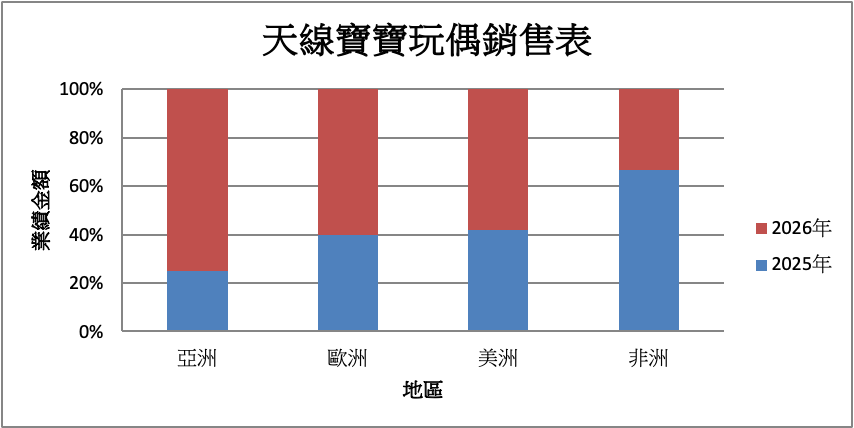

### 3D立體直條圖BarChart3D（）

其他觀念和直條圖觀念一樣，建立3D立體直條圖物件語法如下：
`chart = BarChart3D()`

此外，使用前要先導入 BarChart3D 模組，如下所示：
`from openpyxl.chart import BarChart3D`

In [26]:
# 建立百分比堆疊直條圖
import openpyxl
from openpyxl.chart import BarChart3D, Reference

wb = openpyxl.Workbook()                # 開啟活頁簿
ws = wb.active                          # 獲得目前工作表
rows = [
    ['', '2025年', '2026年'],
    ['亞洲', 100, 300],
    ['歐洲', 400, 600],
    ['美洲', 500, 700],
    ['非洲', 200, 100]]
for row in rows:
    ws.append(row)
    
# 建立資料來源
data = Reference(ws,min_col=2,max_col=3,min_row=1,max_row=5)    

# 建立3D立體直條圖物件
chart = BarChart3D()                    # 3D立體直條圖

# 將資料加入圖表
chart.add_data(data, titles_from_data=True) # 建立圖表
# 建立圖表和座標軸標題
chart.title = '天線寶寶玩偶銷售表'          # 圖表標題
chart.x_axis.title = '地區'             # x軸標題
chart.y_axis.title = '業績金額'         # y軸標題
# x軸資料標籤 (亞洲歐洲美洲非洲)
xtitle = Reference(ws,min_col=1,min_row=2,max_row=5)         
chart.set_categories(xtitle)

# 建立百分比堆疊直條圖, 不設定 chart.overlap
# chart.grouping = "percentStacked"

# 建立百分比堆疊直條圖, 不設定 chart.overlap
chart.grouping = "percentStacked"
chart.overlap = 100
# 將圖表放在工作表 E1
ws.add_chart(chart, 'E1')      
wb.save('./output file/天線寶寶玩偶銷售表.xlsx')

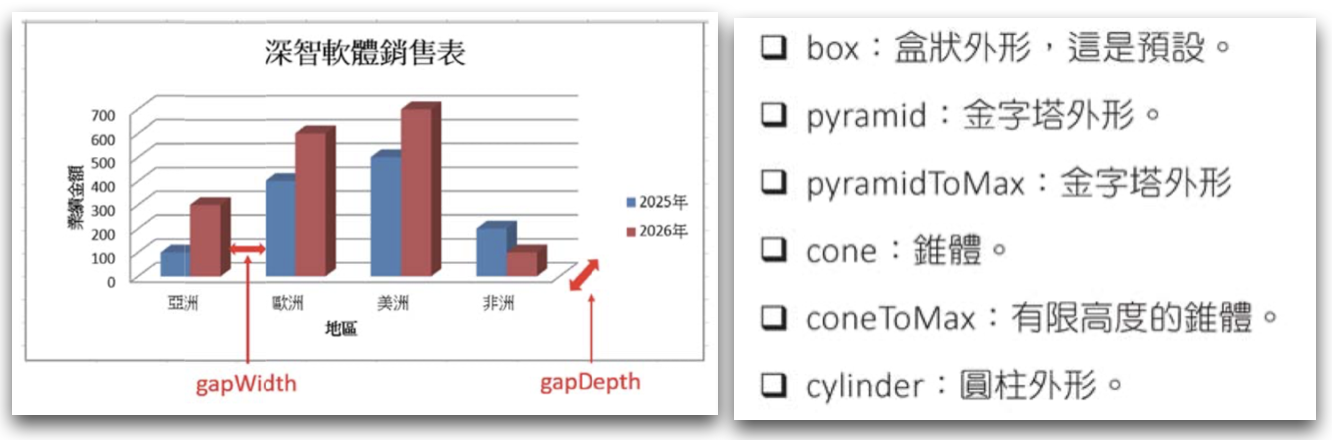

In [27]:
# 建立各種外型
import openpyxl
from openpyxl.chart import BarChart3D, Reference

wb = openpyxl.Workbook()                # 開啟活頁簿
ws = wb.active                          # 獲得目前工作表
rows = [
    ['', '2025年', '2026年'],
    ['亞洲', 100, 300],
    ['歐洲', 400, 600],
    ['美洲', 500, 700],
    ['非洲', 200, 100]]
for row in rows:
    ws.append(row)
    
# 建立資料來源
data = Reference(ws,min_col=2,max_col=3,min_row=1,max_row=5)    

# 建立3D立體直條圖物件
chart = BarChart3D()                    # 3D立體直條圖
chart.shape = "pyramidToMax"
# chart.shape = "cone"
# chart.shape = "coneToMax"
# chart.shape = "cylinder"

# 將資料加入圖表
chart.add_data(data, titles_from_data=True) # 建立圖表
# 建立圖表和座標軸標題
chart.title = '天線寶寶玩偶銷售表'          # 圖表標題
chart.x_axis.title = '地區'             # x軸標題
chart.y_axis.title = '業績金額'         # y軸標題
# x軸資料標籤 (亞洲歐洲美洲非洲)
xtitle = Reference(ws,min_col=1,min_row=2,max_row=5)         
chart.set_categories(xtitle)

# 建立百分比堆疊直條圖, 不設定 chart.overlap
# chart.grouping = "percentStacked"

# 建立百分比堆疊直條圖, 不設定 chart.overlap
chart.grouping = "percentStacked"
chart.overlap = 100
# 將圖表放在工作表 E1
ws.add_chart(chart, 'E1')      
wb.save('./output file/天線寶寶玩偶銷售表.xlsx')

### 一個excel建立多張圖表

```
from copy import deepcopy

# 另外複製一份, 建立圓錐圖
chart2 = deepcopy(chart)
```

In [28]:
import openpyxl
from openpyxl.chart import BarChart3D, Reference
from copy import deepcopy

wb = openpyxl.Workbook()                # 開啟活頁簿
ws = wb.active                          # 獲得目前工作表
rows = [
    ['', '2023年', '2024年'],
    ['亞洲', 100, 300],
    ['歐洲', 400, 600],
    ['美洲', 500, 700],
    ['非洲', 200, 100]]
for row in rows:
    ws.append(row)
    
# 建立資料來源
data = Reference(ws,min_col=2,max_col=3,min_row=1,max_row=5)    
# 建立3D立體直條圖物件
chart = BarChart3D()                    # 3D立體直條圖
chart.shape = "cylinder"
# 將資料加入圖表
chart.add_data(data, titles_from_data=True) # 建立圖表
# 建立圖表和座標軸標題
chart.title = '天線寶寶玩偶銷售表'          # 圖表標題
chart.x_axis.title = '地區'             # x軸標題
chart.y_axis.title = '業績金額'         # y軸標題
# x軸資料標籤 (亞洲歐洲美洲非洲)
xtitle = Reference(ws,min_col=1,min_row=2,max_row=5)         
chart.set_categories(xtitle)
# 將圖表放在工作表 E1
ws.add_chart(chart, 'E1')
# 另外複製一份, 建立圓錐圖
chart2 = deepcopy(chart)
chart2.shape = "cone"
ws.add_chart(chart2, 'E16')
wb.save('./output file/天線寶寶玩偶銷售表.xlsx')

## 折線圖 LineChart（）
折線圖的函數是 LineChart（），在使用前需要先導入 LineChart 模組。
`from openpyxl.chart import LineChart`

下列是建立折線圖物件的實例。
`chart = LineChart（）`

有了折線圖物件後，下列屬性意義與直條圖相同。
- chart.title：建立圖表標題。
- chart.x_axis.title :x 軸標題。
- chart.y_axis.title：y 軸標題。
- chart.width：圖表寬度。
- chart.height：圖表高度。
- chart.style：圖表色彩樣式。
- chart.legend：是否顯示圖例。
- chart.legend.position：圖例位置。
- chart.grouping：標準、堆疊或百分比堆疊設定。

In [4]:
import openpyxl
from openpyxl.chart import LineChart, Reference

wb = openpyxl.Workbook()                # 開啟活頁簿
ws = wb.active                          # 獲得目前工作表
rows = [
    ['', 'Benz', 'BMW', 'Audi'],
    ['2020年', 400, 300, 250],
    ['2021年', 350, 250, 300],
    ['2022年', 500, 300, 450],
    ['2023年', 300, 250, 420],
    ['2024年', 200, 350, 270]]
for row in rows:
    ws.append(row)
    
# 建立資料來源
data = Reference(ws,min_col=2,max_col=4,min_row=1,max_row=6)    
# 建立折線圖物件
chart = LineChart()                      # 折線圖
# 將資料加入圖表
chart.add_data(data, titles_from_data=True) # 建立圖表
# 建立圖表和座標軸標題
chart.title = '汽車銷售表'                # 圖表標題
chart.x_axis.title = '年度'               # x軸標題
chart.y_axis.title = '銷售數'             # y軸標題
# x軸資料標籤 (年度)
xtitle = Reference(ws,min_col=1,min_row=2,max_row=6)         
chart.set_categories(xtitle)

# 使用style = 42, 設定色彩樣式
chart.style = 42

# 將圖表放在工作表 E1
ws.add_chart(chart, 'E1')      
wb.save('./output file/汽車銷售表.xlsx')

### 堆疊折線圖
堆疊折線圖的觀念和直條圖觀念一樣，是將數據堆疊，若是以本章的實例而言就是每年的銷售數量疊加起來，設定如下：
```
chart.grouping = "stacked" ＃堆疊折線圖
chart.grouping = "percentStacked" ＃百分比堆疊折線圖
```




In [1]:
# 堆疊折線圖
import openpyxl
from openpyxl.chart import LineChart, Reference

wb = openpyxl.Workbook()                # 開啟活頁簿
ws = wb.active                          # 獲得目前工作表
rows = [
    ['', 'Benz', 'BMW', 'Audi'],
    ['2020年', 400, 300, 250],
    ['2021年', 350, 250, 300],
    ['2022年', 500, 300, 450],
    ['2023年', 300, 250, 420],
    ['2024年', 200, 350, 270]]
for row in rows:
    ws.append(row)
    
# 建立資料來源
data = Reference(ws,min_col=2,max_col=4,min_row=1,max_row=6)    
# 建立折線圖物件
chart = LineChart()                      # 折線圖
# 將資料加入圖表
chart.add_data(data, titles_from_data=True) # 建立圖表
# 建立圖表和座標軸標題
chart.title = '汽車銷售表'                # 圖表標題
chart.x_axis.title = '年度'               # x軸標題
chart.y_axis.title = '銷售數'             # y軸標題
# x軸資料標籤 (年度)
xtitle = Reference(ws,min_col=1,min_row=2,max_row=6)         
chart.set_categories(xtitle)

# 堆疊折線圖
chart.grouping = "stacked"
# 將圖表放在工作表 E1
ws.add_chart(chart, 'E1')      
wb.save('./output file/汽車銷售表.xlsx')

In [2]:
# 百分比堆疊折線圖
import openpyxl
from openpyxl.chart import LineChart, Reference

wb = openpyxl.Workbook()                # 開啟活頁簿
ws = wb.active                          # 獲得目前工作表
rows = [
    ['', 'Benz', 'BMW', 'Audi'],
    ['2020年', 400, 300, 250],
    ['2021年', 350, 250, 300],
    ['2022年', 500, 300, 450],
    ['2023年', 300, 250, 420],
    ['2024年', 200, 350, 270]]
for row in rows:
    ws.append(row)
    
# 建立資料來源
data = Reference(ws,min_col=2,max_col=4,min_row=1,max_row=6)    
# 建立折線圖物件
chart = LineChart()                      # 折線圖
# 將資料加入圖表
chart.add_data(data, titles_from_data=True) # 建立圖表
# 建立圖表和座標軸標題
chart.title = '汽車銷售表'                # 圖表標題
chart.x_axis.title = '年度'               # x軸標題
chart.y_axis.title = '銷售數'             # y軸標題
# x軸資料標籤 (年度)
xtitle = Reference(ws,min_col=1,min_row=2,max_row=6)         
chart.set_categories(xtitle)

# 堆疊折線圖
# chart.grouping = "stacked"

# 百分比堆疊折線圖
chart.grouping = "percentStacked"

# 將圖表放在工作表 E1
ws.add_chart(chart, 'E1')      
wb.save('./output file/汽車銷售表.xlsx')

In [7]:
# 將線條設為平滑
import openpyxl
from openpyxl.chart import LineChart, Reference

wb = openpyxl.Workbook()                # 開啟活頁簿
ws = wb.active                          # 獲得目前工作表
rows = [
    ['', 'Benz', 'BMW', 'Audi'],
    ['2020年', 400, 300, 250],
    ['2021年', 350, 250, 300],
    ['2022年', 500, 300, 450],
    ['2023年', 300, 250, 420],
    ['2024年', 200, 350, 270]]
for row in rows:
    ws.append(row)
    
# 建立資料來源
data = Reference(ws,min_col=2,max_col=4,min_row=1,max_row=6)    
# 建立折線圖物件
chart = LineChart()                      # 折線圖
# 將資料加入圖表
chart.add_data(data, titles_from_data=True) # 建立圖表
# 建立圖表和座標軸標題
chart.title = '汽車銷售表'                # 圖表標題
chart.x_axis.title = '年度'               # x軸標題
chart.y_axis.title = '銷售數'             # y軸標題
# x軸資料標籤 (年度)
xtitle = Reference(ws,min_col=1,min_row=2,max_row=6)         
chart.set_categories(xtitle)
# 建立線條資料點符號
s0 = chart.series[0]                # 線條編號 0 - Benz
s0.smooth = True
s1 = chart.series[1]                # 線條編號 1 - BMW
s1.smooth = True
s2 = chart.series[2]                # 線條編號 2 - BMW
s2.smooth = True

# 使用style = 42, 設定色彩樣式
chart.style = 42

# 將圖表放在工作表 E1
ws.add_chart(chart, 'E1')      
wb.save('./output file/汽車銷售表-平滑曲線.xlsx')


### 資料點標記
建立資料點的標記、大小、填滿顏色與外框類色,這些屬性內容如下:

- marker.symbol:標記,可以是'x'、'picture'、'dash'、'triangle'、'star'、'square'、'plus'、'circle'、'dot'、'auto'、'diamond'。
- marker.size:標記的大小,可以用浮點數。
- graphicalProperties.solidFill:填充標記的顏色,可以使用RGB色彩('FF0000'),也可以用ColorChoice()函數。
- graphicalProperties.line.solidFill:填充標記外框的顏色,可以使用RGB色彩('FF0000'),也可以用ColorChoice()函數。

In [8]:
import openpyxl
from openpyxl.chart import LineChart, Reference

wb = openpyxl.Workbook()                # 開啟活頁簿
ws = wb.active                          # 獲得目前工作表
rows = [
    ['', 'Benz', 'BMW', 'Audi'],
    ['2020年', 400, 300, 250],
    ['2021年', 350, 250, 300],
    ['2022年', 500, 300, 450],
    ['2023年', 300, 250, 420],
    ['2024年', 200, 350, 270]]
for row in rows:
    ws.append(row)
    
# 建立資料來源
data = Reference(ws,min_col=2,max_col=4,min_row=1,max_row=6)    
# 建立折線圖物件
chart = LineChart()                      # 折線圖
# 將資料加入圖表
chart.add_data(data, titles_from_data=True) # 建立圖表
# 建立圖表和座標軸標題
chart.title = '汽車銷售表'                # 圖表標題
chart.x_axis.title = '年度'               # x軸標題
chart.y_axis.title = '銷售數'             # y軸標題
# x軸資料標籤 (年度)
xtitle = Reference(ws,min_col=1,min_row=2,max_row=6)         
chart.set_categories(xtitle)
# 建立線條資料點符號
s0 = chart.series[0]                      # 線條編號 0 - Benz
s0.marker.symbol = "diamond"
s0.marker.size = 8
s0.marker.graphicalProperties.solidFill = 'FF0000'       # 標記內部
s0.marker.graphicalProperties.line.solidFill = 'FF0000'  # 標記輪廓

s1 = chart.series[1]                      # 線條編號 1 - BMW
s1.marker.symbol = "circle"
s1.marker.size = 5
s1.marker.graphicalProperties.solidFill = '00FF00'       # 標記內部
s1.marker.graphicalProperties.line.solidFill = '00FF00'  # 標記輪廓

s2 = chart.series[2]                      # 線條編號 2 - Audi
s2.marker.symbol = "star"
s2.marker.size = 10
s2.marker.graphicalProperties.solidFill = '0000FF'       # 標記內部
s2.marker.graphicalProperties.line.solidFill = '0000FF'  # 標記輪廓
# 將圖表放在工作表 E1
ws.add_chart(chart, 'E1')      
wb.save('./output file/汽車銷售表-資料點標記.xlsx')

### 折線圖的線條樣式

線條物件也可以建立線條樣式、顏色和寬度,這些屬性內容如下:

- graphicalProperties.line.solidFill:可以用RGB色彩設定線條顏色。
- graphicalProperties.line.dashStyle:線條樣式,可以有'dash'、'dot’、'dashDot'、'sysDot'、'sysDashDot'、'sysDashDotDot'、'dashDot'、'syaDash'、'lgDash'、"IgDashDot'、'IgDashDotDot'。
- graphicalProperties.line.width:線條的寬度,使用EMU模組轉換。
- graphicalProperties.line.noFill:預設是False,如果是True可以隱藏線條。

In [10]:
# ch16_7.py
import openpyxl
from openpyxl.chart import LineChart, Reference
from openpyxl.utils.units import pixels_to_EMU

wb = openpyxl.Workbook()                # 開啟活頁簿
ws = wb.active                          # 獲得目前工作表
rows = [
    ['', 'Benz', 'BMW', 'Audi'],
    ['2020年', 400, 300, 250],
    ['2021年', 350, 250, 300],
    ['2022年', 500, 300, 450],
    ['2023年', 300, 250, 420],
    ['2024年', 200, 350, 270]]
for row in rows:
    ws.append(row)
    
# 建立資料來源
data = Reference(ws,min_col=2,max_col=4,min_row=1,max_row=6)    
# 建立折線圖物件
chart = LineChart()                      # 折線圖
# 將資料加入圖表
chart.add_data(data, titles_from_data=True) # 建立圖表
# 建立圖表和座標軸標題
chart.title = '汽車銷售表'                # 圖表標題
chart.x_axis.title = '年度'               # x軸標題
chart.y_axis.title = '銷售數'             # y軸標題
# x軸資料標籤 (年度)
xtitle = Reference(ws,min_col=1,min_row=2,max_row=6)         
chart.set_categories(xtitle)
# 建立線條資料點標記和樣式
# 線條編號 0 標記
s0 = chart.series[0]                      # 線條編號 0 - Benz
s0.marker.symbol = "diamond"
s0.marker.size = 8
s0.marker.graphicalProperties.solidFill = 'FF0000'       # 標記內部
s0.marker.graphicalProperties.line.solidFill = 'FF0000'  # 標記輪廓
# 線條編號 0 樣式
s0.graphicalProperties.line.solidFill = '00AAAA'         
s0.graphicalProperties.line.dashStyle = "dashDot"
s0.graphicalProperties.line.width = pixels_to_EMU(3)
# 線條編號 1 標記
s1 = chart.series[1]                      # 線條編號 1 - BMW
s1.marker.symbol = "circle"
s1.marker.size = 5
s1.marker.graphicalProperties.solidFill = '00FF00'       # 標記內部
s1.marker.graphicalProperties.line.solidFill = '00FF00'  # 標記輪廓
# 線條編號 1 樣式
s1.graphicalProperties.line.solidFill = 'FF69B4'         
s1.graphicalProperties.line.dashStyle = "dot"
s1.graphicalProperties.line.width = pixels_to_EMU(3) # 設定寬度
s1.graphicalProperties.line.noFill = True   # 讓線不見

# 線條編號 2 標記
s2 = chart.series[2]                      # 線條編號 2 - Audi
s2.marker.symbol = "star"
s2.marker.size = 10
s2.marker.graphicalProperties.solidFill = '0000FF'       # 標記內部
s2.marker.graphicalProperties.line.solidFill = '0000FF'  # 標記輪廓
# 線條編號 2 樣式
s2.graphicalProperties.line.solidFill = 'FFA500'       
s2.graphicalProperties.line.dashStyle = "dash"         
s2.graphicalProperties.line.width = pixels_to_EMU(3) 
# 將圖表放在工作表 E1
ws.add_chart(chart, 'E1')      
wb.save('./output file/汽車銷售表-線條樣式.xlsx')

### 3D 立體折線圖

3D立體折線圖的函數是`LineChart3D()`,許多觀念和折線圖觀念一樣,建立3D立體直條圖物件語法如下:
```
chart = LineChart3D')
```

此外,使用前要先導入LineChart3D模組,如下所示:
```
from openpyxl.chart import LineChart3D
```

3D立體折線圖與折線圖的差異如下:
- 無法設定標記(marker)。
- 無法使用noFill屬性隱藏線條。
- 圖例不是預設,不過可以自行設定。


In [12]:
import openpyxl
from openpyxl.chart import LineChart3D, Reference

wb = openpyxl.Workbook()                # 開啟活頁簿
ws = wb.active                          # 獲得目前工作表
rows = [
    ['', 'Benz', 'BMW', 'Audi'],
    ['2025年', 400, 300, 250],
    ['2026年', 350, 250, 300],
    ['2027年', 500, 300, 450],
    ['2028年', 300, 250, 420],
    ['2029年', 200, 350, 270]]
for row in rows:
    ws.append(row)
    
# 建立資料來源
data = Reference(ws,min_col=2,max_col=4,min_row=1,max_row=6)    
# 建立3D折線圖物件
chart = LineChart3D()                     # 3D折線圖
# 將資料加入圖表
chart.add_data(data, titles_from_data=True) # 建立圖表
# 建立圖表和座標軸標題
chart.title = '汽車銷售表'                # 圖表標題
chart.x_axis.title = '年度'               # x軸標題
chart.y_axis.title = '銷售數'             # y軸標題
# x軸資料標籤 (年度)
xtitle = Reference(ws,min_col=1,min_row=2,max_row=6)         
chart.set_categories(xtitle)

# 建立3D線條樣式
# 線條編號 0 樣式
s0 = chart.series[0]                      # 線條編號 0 - Benz
s0.graphicalProperties.line.solidFill = '00AAAA'         
s0.graphicalProperties.line.width = pixels_to_EMU(3)
# 線條編號 1 樣式
s1 = chart.series[1]                      # 線條編號 1 - BMW
s1.graphicalProperties.line.solidFill = 'FF69B4'         
s1.graphicalProperties.line.width = pixels_to_EMU(3)
# 線條編號 2 樣式
s2 = chart.series[2]                      # 線條編號 2 - Audi
s2.graphicalProperties.line.solidFill = 'FFA500'                
s2.graphicalProperties.line.width = pixels_to_EMU(3) 


# 將圖表放在工作表 E1
ws.add_chart(chart, 'E1')      
wb.save('./output file/汽車銷售表-立體圖.xlsx')


## 區域圖

區域圖的觀念和折線圖相同,只是線條下方會被填充。

區域圖的函數是AreaChart(),在使用前需要先導入AreaChart模組。
```
from openpyxl.chart import AreaChart
```
下列是建立區域圖物件的實例。
```
chart = AreaChart( )
```
有了區域圖物件後,下列屬性意義與直條圖相同。
- chart.title:建立圖表標題。
- chart.x_axis.title:x軸標題。
- chart.y_axis.title:y軸標題。
- chart.width:圖表寬度。
- chart.height:圖表高度。
- chart.style:圖表色彩樣式。
- chart.legend:是否顯示圖例。
- chart.legend.position:圖例位置。
- chart.grouping:標準、堆疊或百分比堆疊設定。

In [15]:
import openpyxl
from openpyxl.chart import AreaChart, Reference

wb = openpyxl.Workbook()                # 開啟活頁簿
ws = wb.active                          # 獲得目前工作表
rows = [
    ['', 'Benz', 'BMW'],
    ['2025年', 400, 100],
    ['2026年', 350, 150],
    ['2027年', 500, 130],
    ['2028年', 600, 200],
    ['2029年', 450, 220]]
for row in rows:
    ws.append(row)
    
# 建立資料來源
data = Reference(ws,min_col=2,max_col=3,min_row=1,max_row=6)    
# 建立區域圖物件
chart = AreaChart()                      # 區域圖
# 將資料加入圖表
chart.add_data(data, titles_from_data=True) # 建立圖表
# 建立圖表和座標軸標題
chart.title = '汽車銷售表'                # 圖表標題
chart.x_axis.title = '年度'               # x軸標題
chart.y_axis.title = '銷售數'             # y軸標題
# x軸資料標籤 (年度)
xtitle = Reference(ws,min_col=1,min_row=2,max_row=6)         
chart.set_categories(xtitle)

# 使用style = 13
chart.style = 13

# 將圖表放在工作表 E1
ws.add_chart(chart, 'E1')      
wb.save('./output file/區域圖.xlsx')

### 堆疊區域圖

建立堆疊區域圖使用grouping屬性。



In [16]:
import openpyxl
from openpyxl.chart import AreaChart, Reference

wb = openpyxl.Workbook()                # 開啟活頁簿
ws = wb.active                          # 獲得目前工作表
rows = [
    ['', 'Benz', 'BMW'],
    ['2025年', 400, 100],
    ['2026年', 350, 150],
    ['2027年', 500, 130],
    ['2028年', 600, 200],
    ['2029年', 450, 220]]
for row in rows:
    ws.append(row)
    
# 建立資料來源
data = Reference(ws,min_col=2,max_col=3,min_row=1,max_row=6)    
# 建立區域圖物件
chart = AreaChart()                      # 區域圖
# 將資料加入圖表
chart.add_data(data, titles_from_data=True) # 建立圖表
# 建立圖表和座標軸標題
chart.title = '汽車銷售表'                # 圖表標題
chart.x_axis.title = '年度'               # x軸標題
chart.y_axis.title = '銷售數'             # y軸標題
# x軸資料標籤 (年度)
xtitle = Reference(ws,min_col=1,min_row=2,max_row=6)         
chart.set_categories(xtitle)
# 區域編號 0 樣式
s0 = chart.series[0]                      # 區域編號 0 - Benz
s0.graphicalProperties.line.solidFill = '0000FF'    # 輪廓顏色       
s0.graphicalProperties.solidFill = '00FFFF'         # 填充顏色
# 區域編號 1 樣式
s1 = chart.series[1]                      # 區域編號 1 - BMW
s1.graphicalProperties.line.solidFill = 'FF0000'    # 輪廓顏色       
s1.graphicalProperties.solidFill = 'FFA500'         # 填充顏色
# 將圖表放在工作表 E1
ws.add_chart(chart, 'E1')      
wb.save('./output file/堆疊區域圖.xlsx')

### 3D 立體區域圖



3D立體區域圖的函數是AreaChart3D(),許多觀念和區域圖觀念一樣,建立3D立體直條圖物件語法如下:
```
chart = AreaChart3D( )
```

此外,使用前要先導入AreaChart3D模組,如下所示:
```
from openpyxl.chart import AreaChart3D
```

In [17]:
import openpyxl
from openpyxl.chart import AreaChart3D, Reference

wb = openpyxl.Workbook()                # 開啟活頁簿
ws = wb.active                          # 獲得目前工作表
rows = [
    ['', 'BMW', 'Benz'],
    ['2025年', 100, 400],
    ['2026年', 150, 350],
    ['2027年', 130, 500],
    ['2028年', 200, 600],
    ['2029年', 220, 450]]
for row in rows:
    ws.append(row)
    
# 建立資料來源
data = Reference(ws,min_col=2,max_col=3,min_row=1,max_row=6)    
# 建立3D區域圖物件
chart = AreaChart3D()                      # 3D區域圖
# 將資料加入圖表
chart.add_data(data, titles_from_data=True) # 建立圖表
# 建立圖表和座標軸標題
chart.title = '汽車銷售表'                # 圖表標題
chart.x_axis.title = '年度'               # x軸標題
chart.y_axis.title = '銷售數'             # y軸標題
# x軸資料標籤 (年度)
xtitle = Reference(ws,min_col=1,min_row=2,max_row=6)         
chart.set_categories(xtitle)
# 更改3D區域圖樣式
chart.style = 48
# 將圖表放在工作表 E1
ws.add_chart(chart, 'E1')      
wb.save('./output file/立體區域圖.xlsx')


## 散點圖

散點圖主要是可以為每一個系列建立不同的x軸值,散點圖的函數是ScatterChart(),在使用前需要先導入ScatterChart模組。此外,因為是導入不同系列的資料,需要使用Series模組,可以參考下列語法。
```
from openpyxl.chart import ScatterChart, Series
```

下列是建立散點圖物件的實例。
```
chart = ScatterChart( )
```
有了散點圖物件後,下列屬性意義與直條圖相同。
- chart.title:建立圖表標題。
- chart.x_axis.title:x軸標題。
- chart.y_axis.title:y軸標題。
- chart.width:圖表寬度。
- chart.height:圖表高度。
- chart.style:圖表色彩樣式。
- chart.legend:是否顯示圖例。
- chart.legend.position:圖例位置。

In [23]:
import openpyxl
from openpyxl.chart import ScatterChart, Series
from openpyxl.chart import Reference    

wb = openpyxl.Workbook()
ws = wb.active

rows = [
    ['溫度','台北','高雄'],
    [10, 80, 30],
    [15, 100, 50],
    [20, 150, 70],
    [25, 200, 120],
    [30, 320, 360],
    [35, 395, 550],
]
for row in rows:
    ws.append(row)
chart = ScatterChart()
chart.title = "台北與高雄冰品銷量統計表"
chart.style = 13
chart.x_axis.title = '溫度'
chart.y_axis.title = '冰品銷量'

# 建立系列的標記marker和顏色colors
marker = ['circle', 'diamond']
colors = ['FF0000', '0000FF']

# 建立 x 軸的參考資料
xvalues = Reference(ws,min_col=1,min_row=2,max_row=7)
# 分別處理每一個欄位的資料, 先台北, 然後高雄, ...
for i in range(2, 4):
    # 定義系列series的y軸參考資料
    values = Reference(ws,min_col=i,min_row=1,max_row=7)
    # 建立系列物件 s
    s = Series(values,xvalues,title_from_data=True)

    # 建立系列標記
    s.marker.symbol = marker[i-2]
    # 建立系列標記填充顏色
    s.marker.graphicalProperties.solidFill = colors[i-2]
    # 建立系列標記輪廓顏色
    s.marker.graphicalProperties.line.solidFill = colors[i-2]
    # 取消線條顯示
    s.graphicalProperties.line.noFill = True

    # 將系列物件 s 加入散點圖物件
    chart.series.append(s)
ws.add_chart(chart,"E1")
wb.save('./output file/散點圖.xlsx')

## 氣泡圖

氣泡圖與散點圖類似,但是會用第3組數據達立氣泡的大小,圖表可以有多組可以參考的系列,本章筆者從單一系列的氣泡圖說起。

氣泡圖的函數是BubbleChart(),在使用前需要先導入BubbleChart模組。此外,因為是導入不同系列的資料,需要使用Series模組,可以參考下列語法。
```
from openpyxl.chart import BubbleChart, Series
```

下列是建立氣泡圖物件的實例。
```
chart = BubbleChart()
```

有了氣泡圖物件後,下列屬性意義與直條圖相同。

- chart.title:建立圖表標題。
- chart.x_axis.title:x軸標題。
- chart.y_axis.title:y軸標題。
- chart.width:圖表寬度。
- chart.height:圖表高度。
- chart.style:圖表色彩樣式。
- chart.legend:是否顯示圖例。
- chart.legend.position:圖例位置。

總之要建立氣泡圖需要有3組數據,分別如下:
- value:x軸資料
- yvalue:y軸資料
- zvalue:z軸資料,相當於是設定氣泡大小,例如可以用size當作數列物件。

有了上述數據後,可以使用Series()函數將數據組織起來,如下所示:
```
s = Series(values=yvalues, xvalues=xvalues, zvalues=size, title)
```

接著可以將系列物件s加入氣泡圖物件。
```
chart.series.append(s)
```

最後一步是將氣泡圖物件加入工作表。
```
ws.add_chart(chart, "B7") #假設圖表放在B7儲存格
```

In [25]:
import openpyxl
from openpyxl.chart import BubbleChart, Series
from openpyxl.chart import Reference

fn = "./input file/冰品銷售調查表.xlsx"
wb = openpyxl.load_workbook(fn)
ws = wb.active

chart = BubbleChart()
chart.style = 48 
chart.title = ws['B2'].value

# 建立系列物件 s
# 建立 x 軸資料 xvalues
xvalues = Reference(ws,min_col=3,max_col=8,min_row=3)
# 建立 y 軸資料 yvalues
yvalues = Reference(ws,min_col=3,max_col=8,min_row=4)
# 建立 z 軸資料 size, 這是氣泡的大小
size = Reference(ws,min_col=3,max_col=8,min_row=5)
s = Series(values=yvalues,xvalues=xvalues,zvalues=size,
                title="2024年")
# 將系列物件 s 加入氣泡圖物件
chart.series.append(s)
# 將氣泡圖物件加入工作表, 放在 B7
ws.add_chart(chart,"B7")
wb.save('./output file/冰品銷售調查表-氣泡圖.xlsx')


### 立體氣泡圖

In [26]:
import openpyxl
from openpyxl.chart import BubbleChart, Series
from openpyxl.chart import Reference

fn = "./input file/冰品銷售調查表.xlsx"
wb = openpyxl.load_workbook(fn)
ws = wb.active

chart = BubbleChart()
chart.style = 48 
chart.title = ws['B2'].value

# 建立系列物件 s
# 建立 x 軸資料 xvalues
xvalues = Reference(ws,min_col=3,max_col=8,min_row=3)
# 建立 y 軸資料 yvalues
yvalues = Reference(ws,min_col=3,max_col=8,min_row=4)
# 建立 z 軸資料 size, 這是氣泡的大小
size = Reference(ws,min_col=3,max_col=8,min_row=5)
s = Series(values=yvalues,xvalues=xvalues,zvalues=size,
                title="2025年")
# 將系列物件 s 加入氣泡圖物件
chart.series.append(s)
# 建立 3D 氣泡圖
s.bubble3D = True
# 將氣泡圖物件加入工作表, 放在 B7
ws.add_chart(chart,"B7")
wb.save('./output file/冰品銷售調查表-立體氣泡圖.xlsx')


### 多組氣泡圖實作

In [27]:
import openpyxl
from openpyxl.chart import BubbleChart, Series
from openpyxl.chart import Reference
from openpyxl.drawing.fill import GradientStop
from openpyxl.drawing.fill import GradientFillProperties
from openpyxl.drawing.fill import LinearShadeProperties

fn = "./input file/2025-2026年冰品銷售氣溫獲利調查表.xlsx"
wb = openpyxl.load_workbook(fn)
ws = wb.active

chart = BubbleChart()
chart.style = 40
chart.title = "2025年和2026年冰品銷售與獲利調查表"

# 建立系列物件 s
# 建立 x 軸資料 xvalues
xvalues = Reference(ws,min_col=3,max_col=8,min_row=3)
# 建立 y 軸資料 yvalues
yvalues = Reference(ws,min_col=3,max_col=8,min_row=4)
# 建立 z 軸資料 size, 這是氣泡的大小
size = Reference(ws,min_col=3,max_col=8,min_row=5)
s = Series(values=yvalues,xvalues=xvalues,zvalues=size,
           title="2025年")
# 將系列物件 s 加入氣泡圖物件
chart.series.append(s)
# 建立漸層色彩的 3D 氣泡圖
s.bubble3D = True
# 定義 3D 色彩漸變的位置和色彩
gs1 = GradientStop(pos=10000, prstClr="red")
gs2 = GradientStop(pos=50000, prstClr="yellow")
gs3 = GradientStop(pos=90000, prstClr="green")
# 定義漸變色彩物件和色彩方法
gprop = GradientFillProperties()           # 定義漸變色彩物件
gprop.stop_list = [gs1, gs2, gs3]          # 見變色位置和色彩定義
gprop.linear = LinearShadeProperties(90)   # 使用線性漸變色彩方法
# 將設定完成的漸變色彩應用到氣泡物
s.graphicalProperties.gradFill = gprop

# 建立系列物件 s1
# 建立 x 軸資料 xvalues
xvalues = Reference(ws,min_col=3,max_col=8,min_row=8)
# 建立 y 軸資料 yvalues
yvalues = Reference(ws,min_col=3,max_col=8,min_row=9)
# 建立 z 軸資料 size, 這是氣泡的大小
size = Reference(ws,min_col=3,max_col=8,min_row=10)
s1 = Series(values=yvalues,xvalues=xvalues,zvalues=size,
            title="2024年")
# 將系列物件 s 加入氣泡圖物件
chart.series.append(s1)
# 建立 3D 氣泡圖
s1.bubble3D = True

# 將氣泡圖物件加入工作表, 放在 B7
ws.add_chart(chart,"J2")
wb.save("./output file/多組氣泡圖實作.xlsx")


## 圓餅圖



圓餅圖(PieChart)只適合一組資料數列,每個資料用切片表示,代表整體的百分比,切片會按順時針方向繪製,0度代表位於圓餅正上方,這個圖表主要是供了解單筆資料相對於整體資料的關係比。圓餅圖的函數是PieChart(),在使用前需要先導入PieChart模組。
```
from openpyxl.chart import PieChat
```

下列是建立圓餅圖物件的實例。
```
chart = PieChart(firstSliceAng)
```
上述參數firstSliceAng預設是0度,代表第一個圓餅圖切片是從正上方開始,可以由此設定第一個圓餅圖切片依順時針起始角度的位置。有了圓餅圖物件後,下列屬性意義與直條圖相同。

- chart.title:建立圖表標題。
- chart.x_axis.title:x軸標題。
- chart.y_axis.title:y軸標題。
- chart.width:圖表寬度。
- chart.height:圖表高度。
- chart.style:圖表色彩樣式。
- chart.legend:是否顯示圖例。
- chart.legend.position:圖例位置。

In [28]:
import openpyxl
from openpyxl.chart import PieChart, Reference

wb = openpyxl.Workbook()            
ws = wb.active                      # 目前工作表
rows = [
    ['地區', '人次'],
    ['上海', 300],
    ['東京', 600],
    ['香港', 700],
    ['新加坡', 400]]
for row in rows:
    ws.append(row)

chart = PieChart(90)                # 社定圓餅圖開始角度
chart.title = '比奇堡旅遊意向調查表'
# 設定資料來源
data = Reference(ws,min_col=2,min_row=1,max_row=5)
# 將資料加入圓餅圖物件
chart.add_data(data,titles_from_data=True)
# 設定標籤資料
labels = Reference(ws,min_col=1,min_row=2,max_row=5)   
chart.set_categories(labels)        # 設定標籤名稱
ws.add_chart(chart,'D1')            # 將圖表加入工作表
wb.save('./output file/圓餅圖.xlsx')

### 設定切片顏色

In [31]:
import openpyxl
from openpyxl.chart import PieChart, Reference
from openpyxl.chart.series import DataPoint

wb = openpyxl.Workbook()            
ws = wb.active                      # 目前工作表
rows = [
    ['地區', '人次'],
    ['上海', 300],
    ['東京', 600],
    ['香港', 700],
    ['新加坡', 400]]
for row in rows:
    ws.append(row)

chart = PieChart()                  # 圓餅圖
chart.title = '比奇堡旅遊意向調查表'
# 設定資料來源
data = Reference(ws,min_col=2,min_row=1,max_row=5)
# 將資料加入圓餅圖物件
chart.add_data(data,titles_from_data=True)
# 設定標籤資料
labels = Reference(ws,min_col=1,min_row=2,max_row=5)   
chart.set_categories(labels)        # 設定標籤名稱
# 圓餅切片色彩串列
colors = ['0000FF','FF0000','00FF00','61210B']
# 取得切片元素, 所有元素
slices = [DataPoint(idx=i) for i in range(4)]
# 因為只有一組資料, 所以是第0系列, 所有原素
chart.series[0].data_points = slices    
# 設定所有切片的顏色
for i in range(4):
    slices[i].graphicalProperties.solidFill = colors[i]
ws.add_chart(chart,'D1')            # 將圖表加入工作表
wb.save('./output file/圓餅圖設定顏色.xlsx')

### 設定切片分離

In [30]:
import openpyxl
from openpyxl.chart import PieChart, Reference
from openpyxl.chart.series import DataPoint

wb = openpyxl.Workbook()            
ws = wb.active                      # 目前工作表
rows = [
    ['地區', '人次'],
    ['上海', 300],
    ['東京', 600],
    ['香港', 700],
    ['新加坡', 400]]
for row in rows:
    ws.append(row)

chart = PieChart()                  # 圓餅圖
chart.title = '比奇堡旅遊意向調查表'
# 設定資料來源
data = Reference(ws,min_col=2,min_row=1,max_row=5)
# 將資料加入圓餅圖物件
chart.add_data(data,titles_from_data=True)
# 設定標籤資料
labels = Reference(ws,min_col=1,min_row=2,max_row=5)   
chart.set_categories(labels)        # 設定標籤名稱

# 圓餅索引 0 切片分離, 同時設為 '0000FF' 色彩
slice = DataPoint(idx=0,explosion=15)   # 索引 0 切片
# 因為只有一組資料, 所以是第0系列, series[0]
# 下列相當於設定第 0 系列的第 0 索引
chart.series[0].data_points = [slice]   
slice.graphicalProperties.solidFill = "0000FF"  # 藍色

ws.add_chart(chart,'D1')            # 將圖表加入工作表
wb.save('./output file/圓餅圖切片分離.xlsx')

### 顯示切片名稱、資料和百分比

上述圓餅圖的切片預設是沒有顯示資料和百分比,可以使用下列方式顯示:
```
from openpyxl.chart.series import DataLabelList


chart.dataLabels.showPercent = True #顯示百分比
chart.dataLabels.showValue = True #顯示資料值
chart.dataLabels.showCatName = True #顯示資料名稱
```

In [32]:
import openpyxl
from openpyxl.chart import PieChart, Reference
from openpyxl.chart.series import DataLabelList
wb = openpyxl.Workbook()            
ws = wb.active                      # 目前工作表
rows = [
    ['地區', '人次'],
    ['上海', 300],
    ['東京', 600],
    ['香港', 700],
    ['新加坡', 400]]
for row in rows:
    ws.append(row)

chart = PieChart()                  # 圓餅圖
chart.title = '深智員工旅遊意向調查表'
# 設定資料來源
data = Reference(ws,min_col=2,min_row=1,max_row=5)
# 將資料加入圓餅圖物件
chart.add_data(data,titles_from_data=True)
# 設定標籤資料
labels = Reference(ws,min_col=1,min_row=2,max_row=5)   
chart.set_categories(labels)        # 設定標籤名稱
# 顯示切片百分比
chart.dataLabels = DataLabelList()
chart.dataLabels.showPercent = True
ws.add_chart(chart,'D1')            # 將圖表加入工作表
wb.save('./output file/圓餅圖-顯示切片名稱.xlsx')

### 3D 圓餅圖影圖

3D圓餅圖(PieChart3D)觀念和圓餅圖一樣,只是改為3D呈現。3D圓餅圖的函數是PeChart3D(),在使用前需要先導入PieChar3D模組。
```
from openpyxl.chart import PieChat3D
```

下列是建立3D圓餅圖物件的實例。
```
chart = PieChart3D(firstSliceAng)
```
相關參數觀念也和圓餅圖相同。

In [33]:
import openpyxl
from openpyxl.chart import PieChart3D, Reference
from openpyxl.chart.series import DataLabelList
from openpyxl.chart.series import DataPoint

wb = openpyxl.Workbook()            
ws = wb.active                      # 目前工作表
rows = [
    ['地區', '人次'],
    ['上海', 300],
    ['東京', 600],
    ['香港', 700],
    ['新加坡', 400]]
for row in rows:
    ws.append(row)

chart = PieChart3D()                # 3D圓餅圖
chart.title = '深智員工旅遊意向調查表'
chart.style = 26
# 設定資料來源
data = Reference(ws,min_col=2,min_row=1,max_row=5)
# 將資料加入圓餅圖物件
chart.add_data(data,titles_from_data=True)
# 設定標籤資料
labels = Reference(ws,min_col=1,min_row=2,max_row=5)   
chart.set_categories(labels)        # 設定標籤名稱
# 顯示切片百分比
chart.dataLabels = DataLabelList()
chart.dataLabels.showPercent = True
# 圓餅切片色彩串列
colors = ['00FFFF','FF0000','00FF00','FFFF00']
# 取得切片元素, 所有元素
slices = [DataPoint(idx=i) for i in range(4)]
# 因為只有一組資料, 所以是第0系列, 所有原素
chart.series[0].data_points = slices    
# 設定所有切片的顏色
for i in range(4):
    slices[i].graphicalProperties.solidFill = colors[i]
ws.add_chart(chart,'D1')            # 將圖表加入工作表
wb.save('./output file/立體圓餅圖.xlsx')


## 雷達圖(RadarChart)

主要是應用在四維以上數據,同時每一維度的數據可以排序,每一種類別的數值軸均是由中心點放射出來,然後數列的資料點再彼此連接,由雷達圖可以看出數列間的變動,如果所做雷達圖面積越大代表產品越好。雷達圖的函數是RadarChart(),在使用前需要先導入RadarChart模組。
```
from openpyxl.chart import RadarChat
```
下列是建立雷達圖物件的實例。
```
chart = RadarChart( )
```
有了雷達圖物件後,下列屬性意義與直條圖相同。
chart.title:建立圖表標題。
chart.x_axis.title:x軸標題。
chart.y_axis.title:y軸標題。
chart.width:圖表寬度。
chart.height:圖表高度。
chart.style:圖表色彩樣式。
chart.legend:是否顯示圖例。
- chart.legend.position:圖例位置。

此外,雷達圖額外的屬性如下:
- chart.type:如果設為“filled",可以建立填滿色彩的雷達圖。
- chart.y_axis.delete:如果設為True,將不顯示雷達軸的值。

In [34]:
import openpyxl
from openpyxl.chart import RadarChart, Reference

fn = "./input file/飲料調查表.xlsx"
wb = openpyxl.load_workbook(fn)            
ws = wb.active                      

chart = RadarChart()
chart.title = "飲料市調表"
chart.style = 26
# 設定資料來源
data = Reference(ws, min_col=2,max_col=4,min_row=1,max_row=6)
# 將資料加入雷達圖物件
chart.add_data(data,titles_from_data=True)
# 設定標籤資料
labels = Reference(ws, min_col=1,min_row=2,max_row=6)
chart.set_categories(labels)

ws.add_chart(chart, "E1")
wb.save('./output file/飲料調查表.xlsx')